# Advanced ML: Домашнее задание 4

1. Реализуйте базовый частотный метод по Шерлоку Холмсу:

    подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);

    возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе совсем вряд ли сработает), зашифруйте их посредством случайной перестановки символов;

    расшифруйте их таким частотным методом.


In [114]:
import string
import numpy as np
from collections import Counter
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [115]:
np.random.seed(42)

In [116]:
class TextProcessor():

    def __init__(self, language, ngram_range):
        self.token_list = (string.ascii_lowercase + ' ') if language == 'en' else 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
        self.ngram_range = ngram_range
        self.code = ''.join(random.sample(self.token_list, len(self.token_list)))
        self.mapping = str.maketrans(self.token_list, self.code)

    def train(self, text):
        text_lower = ''.join([char for char in text.lower() if char in self.token_list])
        tokized_text = []
        for i in range(len(text_lower) - self.ngram_range + 1):
            tokized_text.append(text_lower[i:i + self.ngram_range])
        frequencies = Counter(tokized_text)
        rating = np.argsort(list(frequencies.values()))[::-1]
        self.frequencies = frequencies
        self.sorted_frequencies = np.array(list(frequencies.keys()))[rating]

    def apply_freq(self, text):
        text_len = len(text)
        text += ' ' * (text_len % self.ngram_range)
        tokized_text = []
        for i in range(0, len(text) - self.ngram_range + 1, self.ngram_range):
            tokized_text.append(text[i:i + self.ngram_range])
        frequencies = Counter(tokized_text)
        rating = np.argsort(list(frequencies.values()))[::-1]
        sorted_tokens = np.array(list(frequencies.keys()))[rating]
        mapping_size = min(len(sorted_tokens), len(self.sorted_frequencies))
        mapping = {}
        for i in range(mapping_size):
            mapping[sorted_tokens[i]] = self.sorted_frequencies[i]
        return ''.join([mapping[n_gram] for n_gram in tokized_text])[:text_len]

    def apply_enc(self, text):
        encoded = text.lower().translate(self.mapping)
        return ''.join([char for char in encoded if char in self.code])
    
    def de_enc_accuracy(self,origin,adaptation):
        origin_tokenized = [char for char in origin.lower() if char in self.token_list]
        adaptation_tokenized = list(adaptation)
        eqs = (np.array (origin_tokenized) == np.array(adaptation_tokenized)).sum()
        return eqs / len(origin)


In [117]:
with open('data/WarAndPeace.txt', 'r',encoding='utf-8') as f:
    train_text_1 = f.read()
with open('data/AnnaKarenina.txt', 'r',encoding='utf-8') as f:
    train_text_2 = f.read()

train_text = train_text_1 + train_text_2

In [118]:
#test_text = 'Бутлер смотрел на эти горы, дышал во все легкие и радовался тому, что он живет, и живет именно он, и на этом прекрасном свете. Радовался он немножко и тому, что он так хорошо вчера вел себя в деле и при наступлении и в особенности при отступлении, когда дело было довольно жаркое, радовался и воспоминанию о том, как вчера, по возвращении их из похода, Маша, или Марья Дмитриевна, сожительница Петрова, угощала их и была особенно проста и мила со всеми, но в особенности, как ему казалось, была к нему ласкова. Марья Дмитриевна, с ее толстой косой, широкими плечами, высокой грудью и сияющей улыбкой покрытого веснушками доброго лица, невольно влекла Бутлера, как сильного, молодого холостого человека, и ему казалось даже, что она желает его. Но он считал, что это было бы дурно по отношению доброго, простодушного товарища, и держался с Марьей Дмитриевной самого простого, почтительного обращения, и радовался на себя за это. Сейчас он думал об этом.'

In [119]:
with open('data/test.txt', 'r',encoding='utf-8') as f:
    test_text = f.read()

In [120]:
processor_one = TextProcessor(language='ru', ngram_range=1)

In [121]:
processor_one.train(train_text)

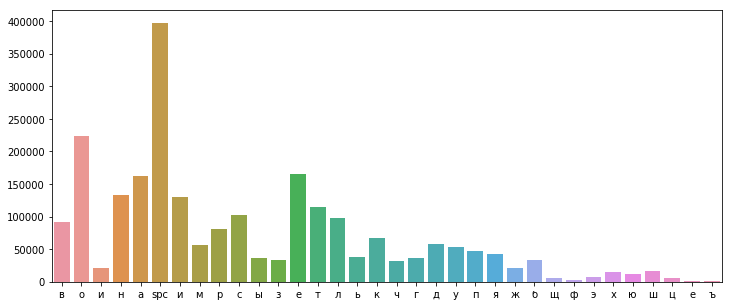

In [122]:
plt.figure(figsize=(12,5))
sns.barplot(list(processor_one.frequencies.keys()), list(processor_one.frequencies.values()))
plt.xticks(range(len(list(processor_one.frequencies.keys()))),[ x if x !=' ' else 'spc' for x in list(processor_one.frequencies.keys())])
plt.show()

In [123]:
encoded = processor_one.apply_enc(test_text)

In [124]:
decoded = processor_one.apply_freq(encoded)

In [125]:
decoded

'он ешаи тз уолмрп ыде яоивжти мазеннпе деньыт р м еыо задекхаи луосктсеиь яод якедиоыоу нетуентг иойадеч но р лвюнолст яо выорокв мосокпч он лдеиаи дарно л лодекхасеиеу ыолстнтцп задекхтрась на день рлеш якоезхаэютш виан уоиоденьмтч релеипч уаиьжтм соиьмо жсо яоивжтрйтч р уолмре ос кодтсеиеч скт сплгжт на обзареденте р яоимв бпи кад якобпсь ро ркеуг рпбокор нелмоиьмо днеч р ыокоде м т надегилг свс на лиарв яорелеитсьлг одтн яоуеютм леуечнпч бпи еув знамоу т он лбткаилг яоешась м неув яороиожтсьлг за еыо дожекьут моыда мараиектлс гртилг знамоутсьлг м вианв т р сос хе режек без рлгмоч двкноч уплит лреи еыо л лротут знамоупут ившнорпу т дквытут тыкомаут р обюеч заие л соыо хе режека виан леи за тыкв т не соиьмо не ездти м знамоуоув яоуеютмв но не лякайтраи боиьйе яко иойадеч т не рпшодти жеспке днг тз моунасподерйтль т наятрйтль жаэ он яодойеи м омнв еув зашосеиоль якочстль жсобп якоынась неосргзжтрпе тыокнпе роляоутнантг он надеи йтнеиь т рпйеи на витцв лоинце вхе лякгсаиоль за беипе до

In [126]:
processor_one.de_enc_accuracy(test_text,decoded)
        

0.4992987377279102

In [133]:
temp_proc= TextProcessor(language='ru', ngram_range=1)

In [135]:
temp_proc.train(test_text)

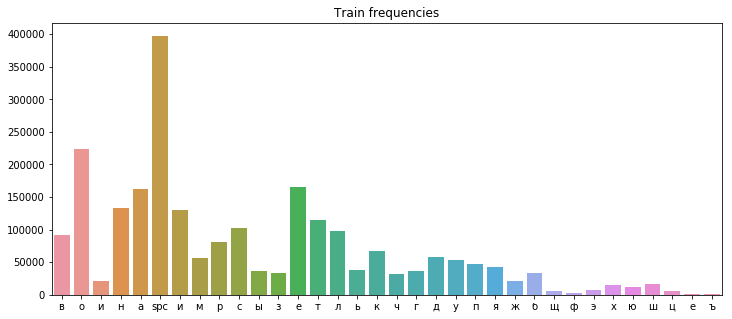

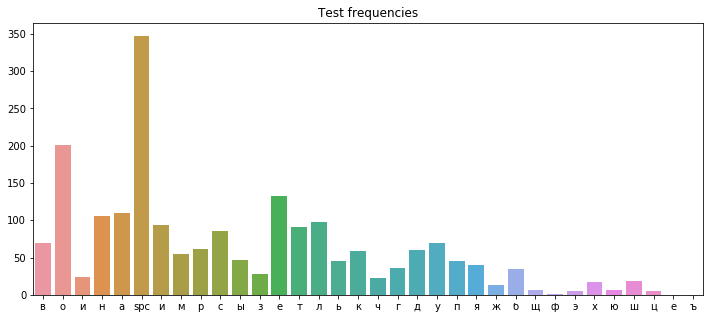

In [145]:
plt.figure(figsize=(12,5))
sns.barplot(list(processor_one.frequencies.keys()), list(processor_one.frequencies.values()))
plt.xticks(range(len(list(processor_one.frequencies.keys()))),[ x if x !=' ' else 'spc' for x in list(processor_one.frequencies.keys())])
plt.title('Train frequencies')
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(list(processor_one.frequencies.keys()),[temp_proc.frequencies[x] for x in list(processor_one.frequencies.keys()) ])
plt.xticks(range(len(list(processor_one.frequencies.keys()))),[ x if x !=' ' else 'spc' for x in list(processor_one.frequencies.keys())])
plt.title('Test frequencies')
plt.show()

Вообще, хотя метрики и плоховаты, распределение символов похоже, но, естественно, есть отклонения, текст, все же, короткий. И еще, было важно, как мне кажется, соблюдать рамки одгого "языка" в том смысле, что если мы возьмем тексты разных авторов, да еще и разной эпохи, картина такого "языка" в виде подобного распределения будет отличаться, и метрики окажутся еще печальнее.

Таким образом можно детектить разных авторов, возможно, какие-то сообщества товарищей по когнитивным нарушениям и т.д. по распределениям символов в их текстах/сообщениях/комментариях. 
Короче говоря, отсылка к [смайлик анализу](https://en.wikipedia.org/wiki/Not_Funny). (Может упомяналось на лекции и я упустил. Не Шерлок Холмс, конечно...)

2. Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:

    подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
    
    проведите тестирование аналогично п.1, но при помощи биграмм.


In [146]:
processor_bi = TextProcessor(language='ru', ngram_range=2)

In [147]:
processor_bi.train(train_text)

In [148]:
encoded_bi = processor_bi.apply_enc(test_text)

In [150]:
decoded_bi = processor_bi.apply_freq(encoded_bi)

In [151]:
processor_bi.de_enc_accuracy(test_text,decoded_bi)

0.11266947171575503

Печально, но не удивительно, тестовый текст слишком короткий (а длинный брать, скорее, не совсем честно). Вряд ли тут можно обойтись без какой-то базовой инициализации (скорее именно так стоит проинтерпретировать шаг Холмса).